In [1]:
#https://www.pythonforfinance.net/2017/10/10/stochastic-oscillator-trading-strategy-backtest-in-python/
#import relevant modules
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt

#download data into DataFrame and create moving averages columns
df = data.DataReader('AAPL', 'yahoo',start='1/1/2018')

#print out first 5 rows of data DataFrame to check in correct format
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,172.300003,169.259995,170.160004,172.259995,25555900.0,169.712067
2018-01-03,174.550003,171.960007,172.529999,172.229996,29517900.0,169.682510
2018-01-04,173.470001,172.080002,172.539993,173.029999,22434600.0,170.470703
2018-01-05,175.369995,173.050003,173.440002,175.000000,23660000.0,172.411560
2018-01-08,175.610001,173.929993,174.350006,174.350006,20567800.0,171.771179


In [2]:
#Create the "L14" column in the DataFrame
df['L14'] = df['Low'].rolling(window=14).min()

#Create the "H14" column in the DataFrame
df['H14'] = df['High'].rolling(window=14).max()

#Create the "%K" column in the DataFrame
df['%K'] = 100*((df['Close'] - df['L14']) / (df['H14'] - df['L14']) )

#Create the "%D" column in the DataFrame
df['%D'] = df['%K'].rolling(window=3).mean()

Text(0.5, 1.0, 'Oscillator')

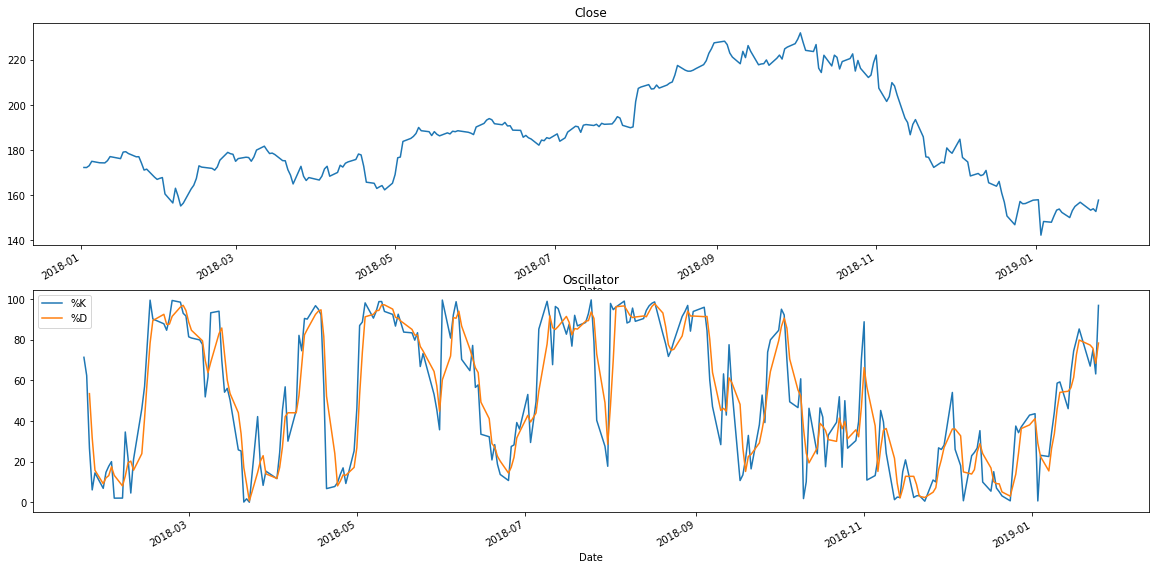

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(20,10))

df['Close'].plot(ax=axes[0]); axes[0].set_title('Close')
df[['%K','%D']].plot(ax=axes[1]); axes[1].set_title('Oscillator')